In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
movies.sort_values(by='duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration,

array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

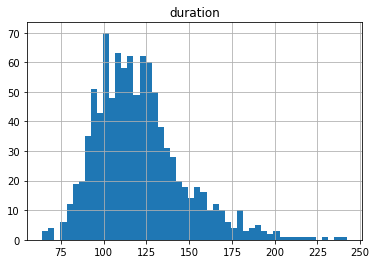

In [8]:
movies.hist('duration', bins=50)

#### Use a box plot to display that same data.

<AxesSubplot:>

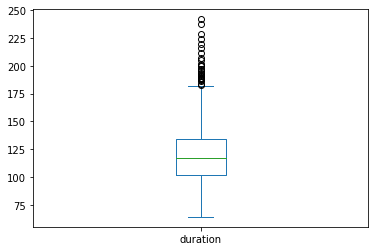

In [9]:
movies.duration.plot(kind='box')

#### Count how many movies have each of the content ratings.

In [10]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

<AxesSubplot:title={'center':'Top 100 IMDB movies by rating'}, xlabel='rating', ylabel='count'>

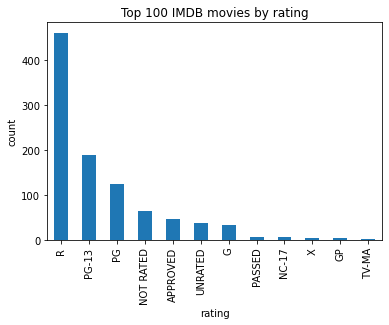

In [11]:
movies.content_rating.value_counts().plot(kind='bar', title='Top 100 IMDB movies by rating',xlabel='rating', ylabel='count')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [12]:
movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP,'],'UNRATED', inplace=True)
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    157
PG         123
G           32
NC-17        7
X            4
GP           3
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [13]:
movies.content_rating.replace(['X', 'TV-MA'],'NC-17', inplace=True)
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    157
PG         123
G           32
NC-17       12
GP           3
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [14]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [15]:
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [16]:
movies.content_rating.fillna('UNRATED', inplace=True)

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [17]:
movies[movies.duration >= 120].star_rating.mean()

7.948898678414082

In [18]:
movies[movies.duration < 120].star_rating.mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

<AxesSubplot:xlabel='duration', ylabel='star_rating'>

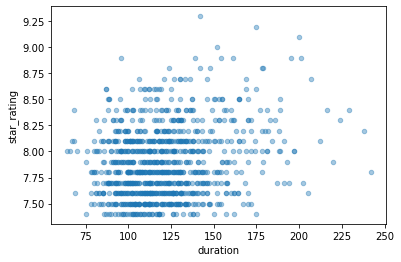

In [19]:
movies.plot(kind='scatter', x='duration', y='star_rating', alpha=0.4)


#### Calculate the average duration for each genre.

In [20]:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

#### Visualize the relationship between content rating and duration.

array([[<AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'GP'}>,
        <AxesSubplot:title={'center':'NC-17'}>],
       [<AxesSubplot:title={'center':'PG'}>,
        <AxesSubplot:title={'center':'PG-13'}>,
        <AxesSubplot:title={'center':'R'}>],
       [<AxesSubplot:title={'center':'UNRATED'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

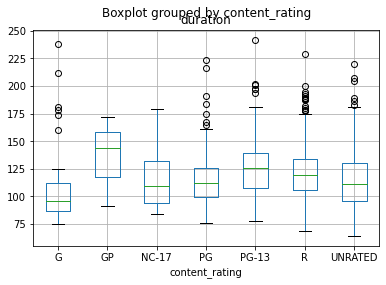

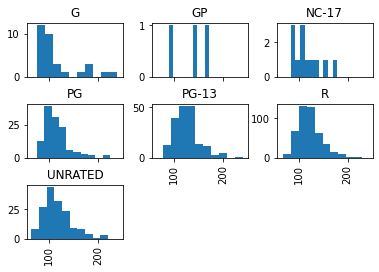

In [21]:
movies.boxplot(column='duration', by='content_rating')
movies.duration.hist(by=movies.content_rating, sharex=True)


#### Determine the top rated movie (by star rating) for each genre.

In [34]:
movies.sort_values('star_rating', ascending=False).groupby('genre').first()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
Comedy,8.6,Modern Times,G,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
Drama,8.9,12 Angry Men,UNRATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Family,7.9,E.T. the Extra-Terrestrial,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [22]:
duplicatedtitles = movies[movies.title.duplicated()].title
movies[movies.title.isin(duplicatedtitles)]
#these are not truly duplicates, different versions

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


In [23]:
# by manually create a list of relevant genres, then filter using that list
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [24]:
genre_most=['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies[movies.genre.isin(genre_most)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [25]:
# by automatically create a list of relevant genres by saving the value_counts and then filtering
genre_counter = movies.genre.value_counts()

In [26]:
most_genre = genre_counter[genre_counter >= 10].index

In [27]:
movies[movies.genre.isin(most_genre)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [28]:
#  by calculating the average star rating for all genres, then filter using a boolean Series
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [31]:
# by aggregating by count and mean then filter using count
genre_ratings = movies.groupby('genre').star_rating.agg(['count', 'mean'])
genre_ratings[genre_ratings['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


#### Figure out something interesting using the actors data

In [29]:
repeatactor = movies[movies.actors_list.duplicated()].actors_list

In [30]:
repeatactor

19     [u'Mark Hamill', u'Harrison Ford', u'Carrie Fi...
80     [u'Mark Hamill', u'Harrison Ford', u'Carrie Fi...
414         [u'Tom Hanks', u'Tim Allen', u'Joan Cusack']
520    [u'Michael J. Fox', u'Christopher Lloyd', u'Le...
551    [u'Daniel Radcliffe', u'Emma Watson', u'Rupert...
642    [u'Daniel Radcliffe', u'Emma Watson', u'Rupert...
727    [u'Daniel Radcliffe', u'Emma Watson', u'Rupert...
814    [u'Ian McKellen', u'Martin Freeman', u'Richard...
891    [u'Daniel Radcliffe', u'Emma Watson', u'Rupert...
932    [u'Daniel Radcliffe', u'Emma Watson', u'Rupert...
Name: actors_list, dtype: object

In [31]:
repeatactor.value_counts()

[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']        5
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']          2
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                  1
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']    1
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']     1
Name: actors_list, dtype: int64

# Daniel Radcliffe, Emma Watson, and Rupert Grint appear on the list the most with 5 appearances each